In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
data = np.loadtxt('data_group2.txt')

In [3]:
years = data[:, 0]
months = data[:, 1]
fluxs = data[:, 2]
sunspots = data[:, 3]
count = len(months)

In [4]:
#Smoothing of monthly mean data (sunspot number and solar radio flux F10.7) by 13-month running mean
r_flux = np.zeros((count - 12, 1))  # smoothed fluxes array
r_sunspots = np.zeros((count - 12, 1))  # smoothed sunspots array

for n in range(r_flux.shape[0]):
    r_flux[n, 0] = 1/24 * (data[n, 2] + data[n + 12, 2]) + 1/12 * sum(data[n + 1:n + 12, 2])
    r_sunspots[n, 0] = 1/24 * (data[n, 3] + data[n + 12, 3]) + 1/12 * sum(data[n + 1:n + 12, 3])


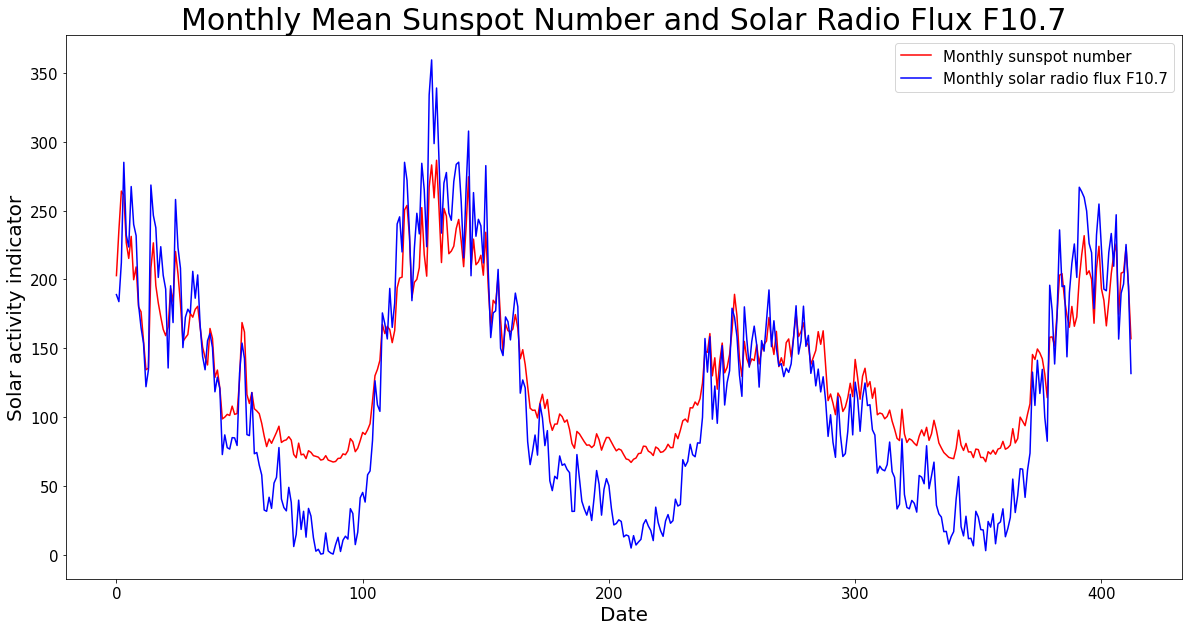

In [5]:
#Plot for monthly mean sunspot number and solar radio flux F10.7 cm
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Monthly Mean Sunspot Number and Solar Radio Flux F10.7', fontsize = 30)
ax.set_ylabel('Solar activity indicator', fontsize = 20)
ax.set_xlabel('Date', fontsize = 20)
ax.plot(fluxs, c='red', label='Monthly sunspot number')
ax.plot(sunspots, c='blue', label='Monthly solar radio flux F10.7')
#ax.set_xticks([0, 100, 200, 300, 400], labels = ['1947', '1955', '1963', '1972', '1980'])
ax.tick_params(axis='both', labelsize=15)
ax.legend(fontsize = 15)

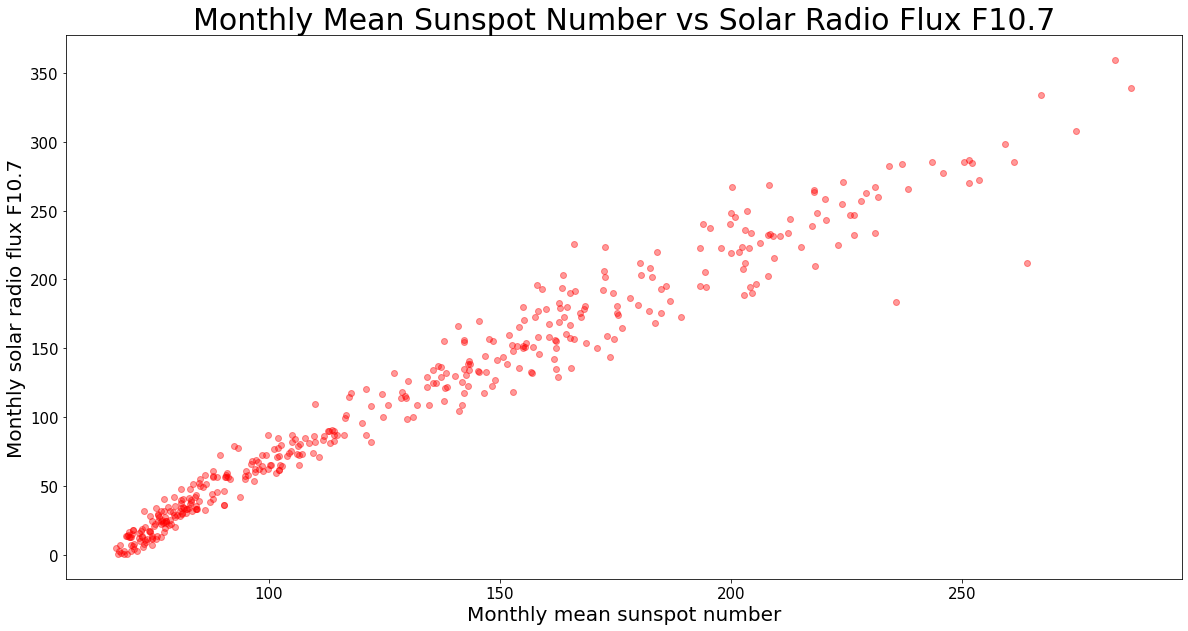

In [6]:
#Scatter plot between monthly mean sunspot number and solar radio flux F10.7 cm
fig, ay = plt.subplots(figsize=(20, 10))
ay.scatter(x=fluxs, y=sunspots, c='red', alpha=0.4)
plt.title('Monthly Mean Sunspot Number vs Solar Radio Flux F10.7', fontsize = 30)
plt.xlabel('Monthly mean sunspot number', fontsize = 20)
plt.ylabel('Monthly solar radio flux F10.7', fontsize = 20)
ay.tick_params(axis='both', labelsize=15)

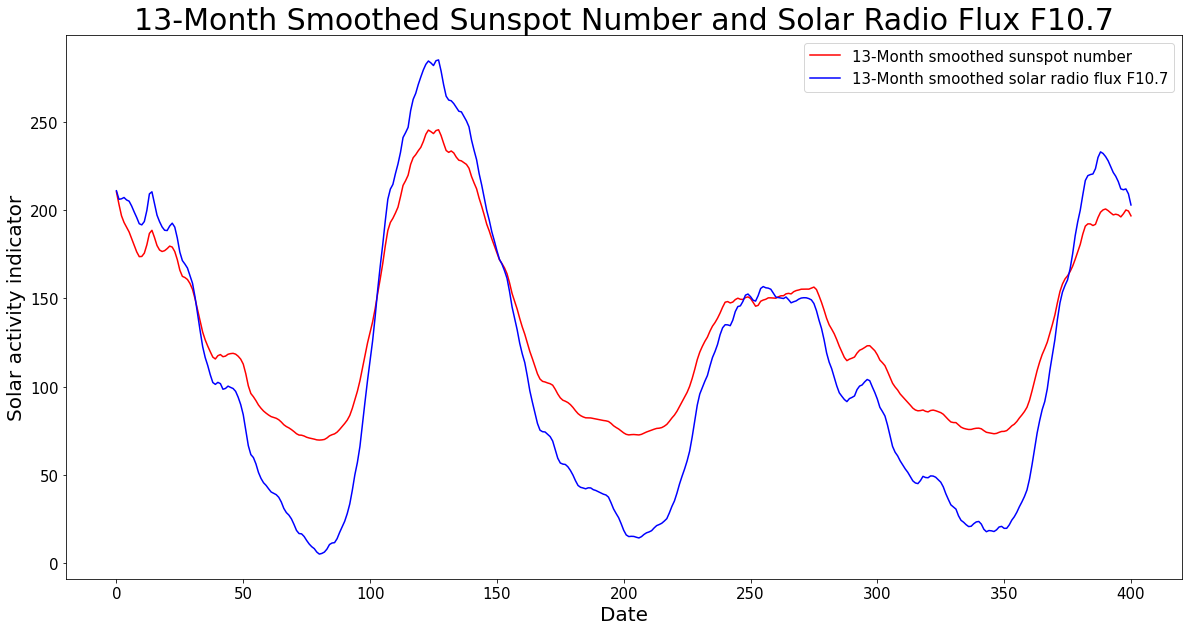

In [7]:
#Plot for monthly mean data (sunspot number and solar radio flux F10.7) by 13-month running mean
fig, az = plt.subplots(figsize=(20,10))
az.set_title('13-Month Smoothed Sunspot Number and Solar Radio Flux F10.7', fontsize = 30)
az.set_ylabel('Solar activity indicator', fontsize = 20)
az.set_xlabel('Date', fontsize = 20)
az.plot(r_flux, c='red', label='13-Month smoothed sunspot number')
az.plot(r_sunspots, c='blue', label='13-Month smoothed solar radio flux F10.7')
ax.plot(fluxs, label='Monthly sunspot number')
ax.plot(sunspots, label='Monthly solar radio flux F10.7')
#az.set_xticks([0, 100, 200, 300, 400], labels = ['1947', '1955', '1963', '1972', '1980'])
az.tick_params(axis='both', labelsize=15)
az.legend(fontsize = 15)

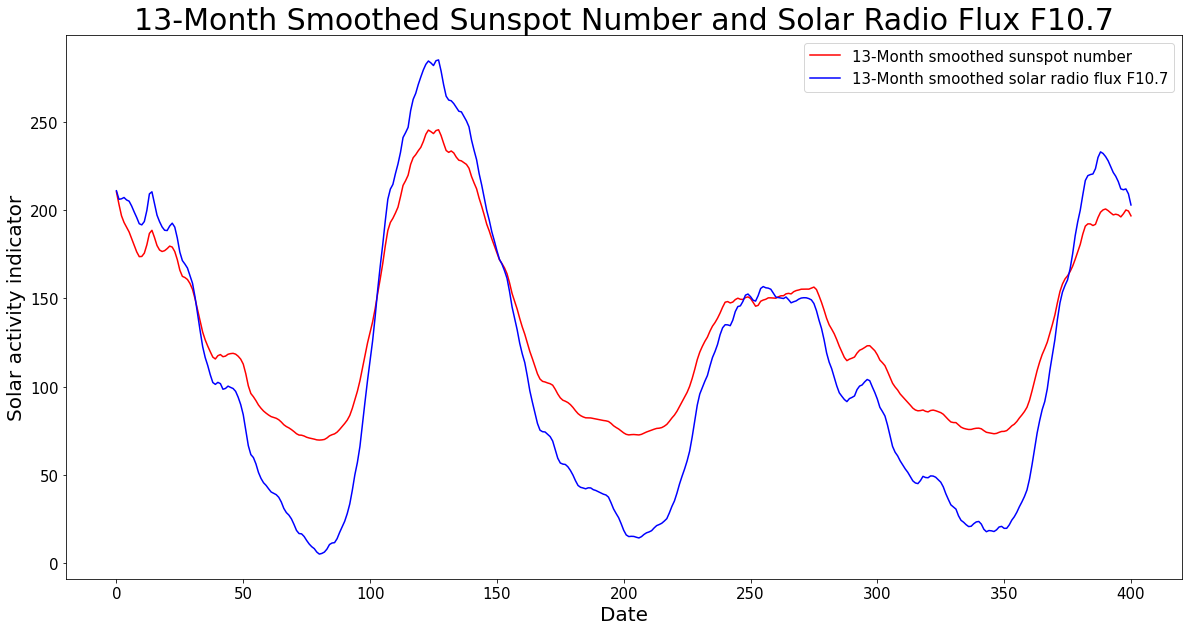

In [8]:
fig, az = plt.subplots(figsize=(20,10))
az.set_title('13-Month Smoothed Sunspot Number and Solar Radio Flux F10.7', fontsize = 30)
az.set_ylabel('Solar activity indicator', fontsize = 20)
az.set_xlabel('Date', fontsize = 20)
az.plot(r_flux, c='red', label='13-Month smoothed sunspot number')
az.plot(r_sunspots, c='blue', label='13-Month smoothed solar radio flux F10.7')
ax.plot(fluxs, c='g', label='Monthly sunspot number')
ax.plot(sunspots, c='y', label='Monthly solar radio flux F10.7')
#az.set_xticks([0, 100, 200, 300, 400], labels = ['1947', '1955', '1963', '1972', '1980'])
az.tick_params(axis='both', labelsize=15)
az.legend(fontsize = 15)

In [9]:
#Determination of vector of regressands and matrix of regressors vector
F = r_flux
R = np.ones((len(F), 4))
R[:, 1] = r_sunspots[:, 0]
R[:, 2] = r_sunspots[:, 0] **2
R[:, 3] = r_sunspots[:, 0] **3
    
print(R)

[[1.00000000e+00 2.10895833e+02 4.44770525e+04 9.38002505e+06]
 [1.00000000e+00 2.06045833e+02 4.24548854e+04 8.74765225e+06]
 [1.00000000e+00 2.06333333e+02 4.25734444e+04 8.78432070e+06]
 ...
 [1.00000000e+00 2.11929167e+02 4.49139717e+04 9.51858059e+06]
 [1.00000000e+00 2.09141667e+02 4.37402367e+04 9.14790601e+06]
 [1.00000000e+00 2.02845833e+02 4.11464321e+04 8.34638231e+06]]


In [10]:
#Determination of vector of coefficients by LSM
B1 = np.transpose(R).dot(R)
B2 = np.linalg.inv(B1)
B3 = B2.dot(np.transpose(R))
B = B3.dot(F)
print(B)

[[ 6.39221474e+01]
 [ 5.13574208e-01]
 [ 5.91876797e-04]
 [-5.55049581e-07]]


In [11]:
#Reconstruct solar radio flux F10.7 on the basis of sunspot number
F1 = R.dot(B)

In [12]:
#Determine the variance of estimation error of solar radio flux F10.7
delta = sum(np.power((F - F1), 2)) / (400)
print(delta)

[12.77277717]


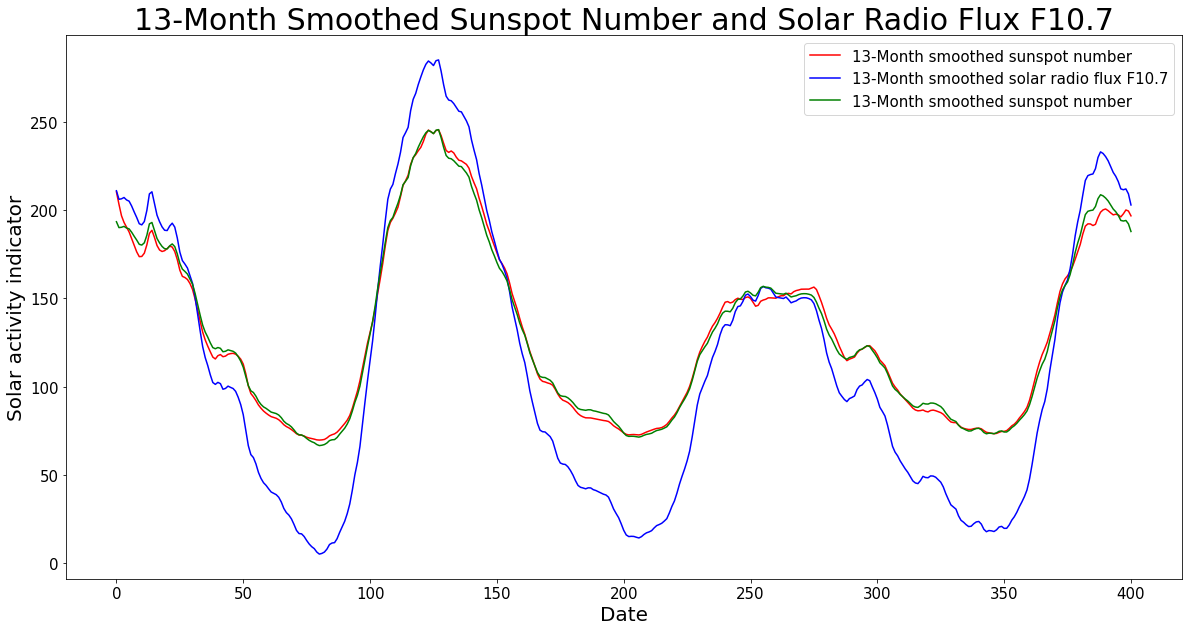

In [14]:
fig, az = plt.subplots(figsize=(20,10))
az.set_title('13-Month Smoothed Sunspot Number and Solar Radio Flux F10.7', fontsize = 30)
az.set_ylabel('Solar activity indicator', fontsize = 20)
az.set_xlabel('Date', fontsize = 20)
az.plot(r_flux, c='red', label='13-Month smoothed sunspot number')
az.plot(r_sunspots, c='blue', label='13-Month smoothed solar radio flux F10.7')
az.plot(F1, c='g', label='13-Month smoothed sunspot number')
ax.plot(fluxs, c='g', label='Monthly sunspot number')
ax.plot(sunspots, c='y', label='Monthly solar radio flux F10.7')
#az.set_xticks([0, 100, 200, 300, 400], labels = ['1947', '1955', '1963', '1972', '1980'])
az.tick_params(axis='both', labelsize=15)
az.legend(fontsize = 15)